# Math For ML

In [50]:
import torch
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


## Linear Algebra I

### Ecuaction System Representation
How represent linear system ecuations with graph and their solves.

$$
d = distance\\
t = time\\
d = 2.5t\\
d = 3(t - 5)
$$

In [51]:
time = np.linspace(0, 40, 1000) # Start, End, Step / N points

distance_thief = 2.5 * time
distance_sherif = 3 * (time - 5)

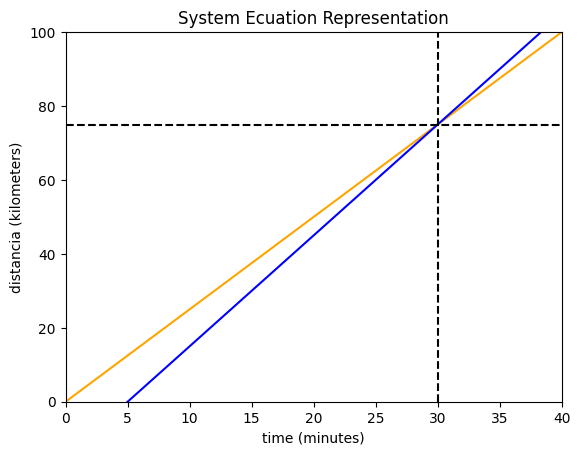

In [52]:
fig, axis = plt.subplots()
plt.title("System Ecuation Representation")

plt.xlabel("time (minutes)")
plt.ylabel("distancia (kilometers)")

axis.set_xlim([0, 40])
axis.set_ylim([0, 100])

axis.plot(time, distance_thief, c="orange")
axis.plot(time, distance_sherif, c="blue")

axis.axvline(x=30, color="black", linestyle="--" )
axis.axhline(y=75, color="black", linestyle="--" )

plt.show()

### Tensors
Are multilinear relationships to convert vector tranformations to linear transformations.

In [53]:
scalar = 32
vector = [1, 2]
matrix = [[5, 8], [5, 6]]

print(scalar, vector, matrix)

32 [1, 2] [[5, 8], [5, 6]]


In [54]:
# PyTorch Tensor
to_tensor = torch.tensor(30)

# TensorFlow Tensor
tf_tensor = tf.Variable(30)

print("Tensor (PyTorch): ", to_tensor)
print("Tensor (TensorFlow): ", tf_tensor)

Tensor (PyTorch):  tensor(30)
Tensor (TensorFlow):  <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=30>


In [55]:
tf.add(tf_tensor, to_tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=60>

In [56]:
print(to_tensor.numpy(), tf_tensor.numpy())

30 30


### Vectors
Are algebra structure in a vectorial space, that allow make differents operations. Can be represented like points, arrows, or pairs with components

In [57]:
vec = np.array([1, 2, 3, 4])
vec.shape

(4,)

#### Components
- X, Y
- Direction
- Magnitude

like:
$$
\begin{pmatrix} x \\ y \\ \cdots \end{pmatrix}
$$

In [58]:
# Norm L2 (Euclidean Length)
np.linalg.norm(vec)

np.float64(5.477225575051661)

## Linear Algebra II
### Tensor Operations
  - Artmetics
  - Tranposition
  - Reduce operations

In [59]:
arr = np.array([[1, 2], [3, 4]]) # Transposition
arr.T

array([[1, 3],
       [2, 4]])

In [60]:
print("Sum: ", arr + 2)
print("Rest: ", arr - 2)
print("Mult: ", arr * 2)
print("Div: ", arr / 2)

Sum:  [[3 4]
 [5 6]]
Rest:  [[-1  0]
 [ 1  2]]
Mult:  [[2 4]
 [6 8]]
Div:  [[0.5 1. ]
 [1.5 2. ]]


In [61]:
print("reduced sum:", arr.sum())
print("reduced max:", arr.max())
print("reduced mean:", arr.max())
print("reduced std:", arr.std())

reduced sum: 10
reduced max: 4
reduced mean: 4
reduced std: 1.118033988749895


In [62]:
arr1 = np.array([[3, 4], [4, 5]])

np.dot(arr, arr1)

array([[11, 14],
       [25, 32]])

### Frobenius Norm

In [63]:
np.linalg.norm(np.array([[1, 2, 3], [4, 5, 6]]))

np.float64(9.539392014169456)

### Symmetric Matrix

In [64]:
m = np.array([[1, 2, 3], [2, 8, 6], [3, 6, 7]])
m.T == m

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

### Identity Matrix

In [65]:
def create_identity_matrix(n):
  I = np.zeros([n, n])
  np.fill_diagonal(I, 1)
  return I


I = np.zeros([3, 3])
np.fill_diagonal(I, 1)
I

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### Inverse Matrix

In [66]:
np.linalg.inv(arr1) * arr1

array([[-15.,  16.],
       [ 16., -15.]])

## Linear Algebra III
- Use tensor for solve ecuation systems
- Identify usefull patterns in the data

### Matrix Tranformations

In [67]:
v = np.array([1, 3])
v

array([1, 3])

In [68]:
def plot_vectors(vectors, colors):
  plt.figure()
  plt.axvline(x=0, color="lightgray")
  plt.axhline(y=0, color="lightgray")

  for i in range(len(vectors)):
    x = np.concatenate([[0, 0], vectors[i]])
    plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                angles="xy",
                scale_units="xy",
                scale=1,
                color=colors[i])

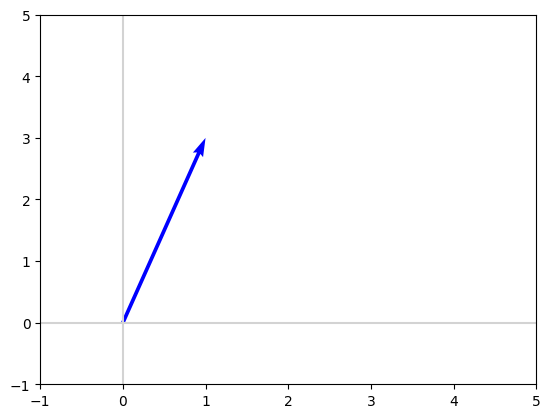

In [69]:
plot_vectors([v], ["blue"])

plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

In [70]:
I2 = np.eye(2)
I2

array([[1., 0.],
       [0., 1.]])

#### Reflection

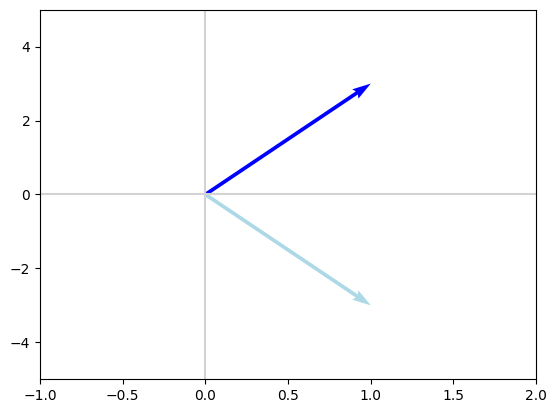

In [71]:
Rx = np.array([[1, 0], [0, -1]]) # Reflect Y axis, convert 1 to -1
vR = np.dot(Rx, v)
plot_vectors([v, vR], ["blue", "lightblue"])

plt.xlim(-1, 2)
_ = plt.ylim(-5, 5)

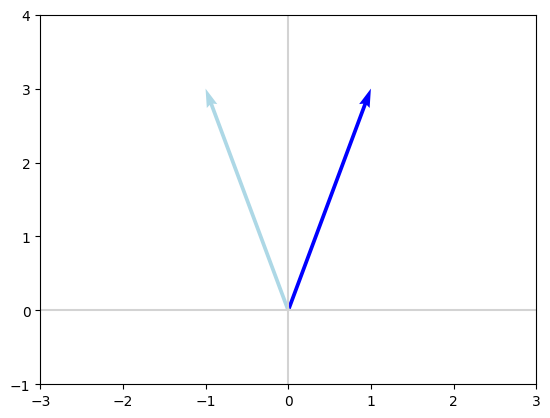

In [72]:
Rx = np.array([[-1, 0], [0, 1]]) # Reflect Y axis, convert 1 to -1
vR = np.dot(Rx, v)
plot_vectors([v, vR], ["blue", "lightblue"])

plt.xlim(-3, 3)
_ = plt.ylim(-1, 4)

#### Scaling

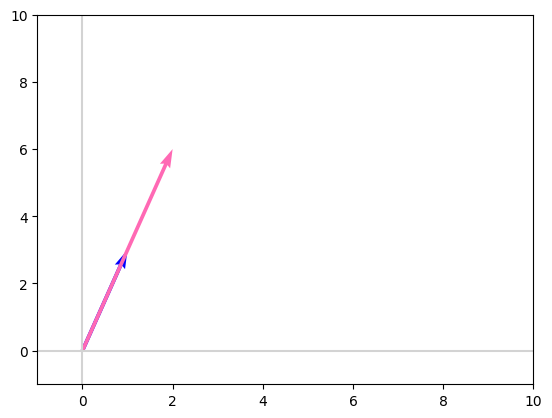

In [73]:
Sc = np.array([[2, 0], [0, 2]])
vS = np.dot(Sc, v)
plot_vectors([v, vS], ["blue", "hotpink"])

plt.xlim(-1, 10)
_ = plt.ylim(-1, 10)

#### Multiple Transformations

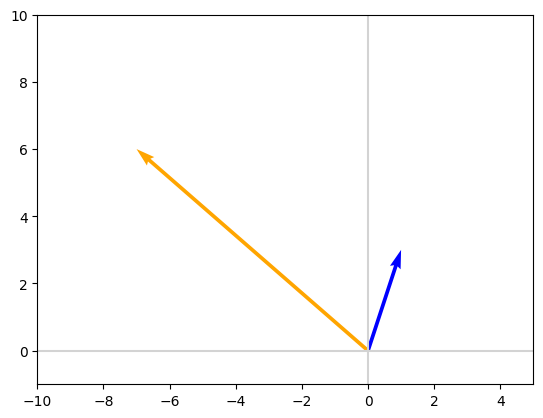

In [74]:
M = np.array([[2, -3], [0, 2]])
vM = np.dot(M, v)
plot_vectors([v, vM], ["blue", "orange"])

plt.xlim(-10, 5)
_ = plt.ylim(-1, 10)

### Eigenvectors
- Are special vectors that, when transformed by a matrix, only change in magnitude, not direction

In [75]:
lambdas, V = np.linalg.eig(M)
print(M)
print("Eigenvalues: ", lambdas)
print("Eigenvectors: ", V)

[[ 2 -3]
 [ 0  2]]
Eigenvalues:  [2. 2.]
Eigenvectors:  [[1.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.48029737e-16]]


In [88]:
v = V[:, 0]
v

array([1., 0.])

In [89]:
Av = np.dot(M, v)
Av

array([2., 0.])

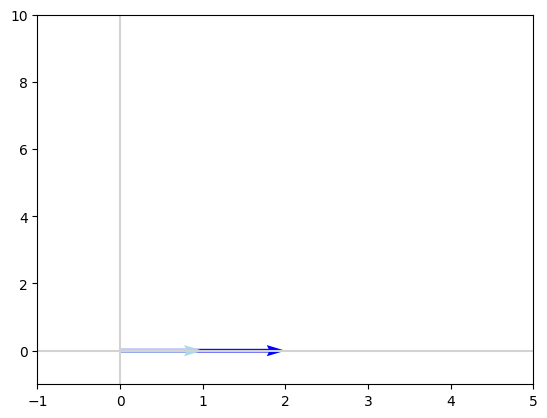

In [90]:
plot_vectors([Av, v], ["blue", "lightblue"])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 10)